# **Machine Learning Project**
Machine learning techniques have emerged as effective tools for classifying network requests as either malicious or legitimate, aiding in the detection and prevention of cyber threats.

Various supervised learning algorithms, such as decision trees, support vector machines (SVMs), and random forests, have been utilized to train models using labeled datasets that distinguish between malicious and legitimate network requests.

Feature engineering plays a crucial role in extracting relevant information from network request attributes, and techniques such as n-gram analysis, that is the technique we have used in this project, have been employed to construct effective feature sets.

## **First Step**
The first step is the conditioning of the dataset. Basically, we consider the URL of each requests, specifically only the last part after the domain and the port.

In [ ]:
import pandas as pd
import numpy as np

#this function prepeare the dataset, taking only the last part of the URL
def prepare_dataset(dataset):
  data = []
  for line in dataset:
    line = line.split(',')
    try:
      page =  line[-1].split('/')[-2].replace('HTTP', '').split('.')[-1].strip()
    except:
      page = line[-1].split('/')[-1].replace('HTTP', '').split('.')[-1].strip()

    if line[-3] != '':
      page += '?'+line[-3]
    data.append((line[0], line[1], page))

  # skip headers
  return np.array(data[1:])


dataset = []
with open('csic_database.csv') as f:
  dataset = f.readlines()

data = prepare_dataset(dataset)
print(data[:,2], data[:, 0])

['jsp'
 'jsp?id=3&nombre=Vino+Rioja&precio=100&cantidad=55&B1=A%F1adir+al+carrito'
 'jsp?id=3&nombre=Vino+Rioja&precio=100&cantidad=55&B1=A%F1adir+al+carrito'
 ... 'jsp?modo=insertar&precio=1126&B1=Pasar+por+caja'
 'jsp?modo=insertar&precio=1126&B1=Pasar+por+caja' 'publico'] ['Normal' 'Normal' 'Normal' ... 'Normal' 'Normal' 'Normal']


## **Second step**
We have performed a k-fold cross-validation using k=6, where 5 folds are used as training set and the last one as validation set.
Using the n-gram technique we have extracted the features from the training set, employing the Tfidf Vectorizer provided by Scikit Learn.

After the tokenization and computation of the features, we have trained 4 different classifiers:

*   Logistic Regression
*   Multinomial Naive Bayes
*   SVM
*   Random Forest

and we have performed an hyper-parameters tuning in order to estimate the best parameters.

FInally, we have tested the accuracy of each classifier and plotted the mean ROC curves for each k, one for each classifier.

[+] Number of features : 81930 
    Features : [' %2b' ' %2c' ' %2f' ... 'zzy%' 'zzy&' 'zzy.'] 


[1] Classifier : MultinomialNB 
    With the following Hyper parameters {'alpha': 0.1} 
    Accuracy : 0.9578947368421052 in 3.35 sec 


[1] Classifier : RandomForestClassifier 
    With the following Hyper parameters {'n_estimators': 50, 'max_features': 'sqrt'} 
    Accuracy : 0.9489122807017544 in 42.72 sec 


[1] Classifier : LogisticRegression 
    With the following Hyper parameters {'C': 0.1, 'solver': 'liblinear'} 
    Accuracy : 0.9061052631578947 in 3.66 sec 




/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[1] Classifier : SVC 
    With the following Hyper parameters {'C': 0.1, 'max_iter': 500} 
    Accuracy : 0.5901754385964912 in 19.82 sec 


[+] Number of features : 82112 
    Features : [' %2c' ' %2f' ' %3f' ... 'zzy%' 'zzy&' 'zzy.'] 


[2] Classifier : MultinomialNB 
    With the following Hyper parameters {'alpha': 0.5} 
    Accuracy : 0.9462380685008422 in 2.91 sec 


[2] Classifier : RandomForestClassifier 
    With the following Hyper parameters {'n_estimators': 50, 'max_features': 'log2'} 
    Accuracy : 0.9609769792251545 in 31.7 sec 


[2] Classifier : LogisticRegression 
    With the following Hyper parameters {'C': 0.5, 'solver': 'liblinear'} 
    Accuracy : 0.9588714205502527 in 4.21 sec 




/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[2] Classifier : SVC 
    With the following Hyper parameters {'C': 0.5, 'max_iter': 500} 
    Accuracy : 0.8064289724873667 in 16.9 sec 


[+] Number of features : 82337 
    Features : [' %2b' ' %2c' ' %2f' ... 'zzy%' 'zzy&' 'zzy.'] 


[3] Classifier : MultinomialNB 
    With the following Hyper parameters {'alpha': 1.0} 
    Accuracy : 0.9376754632229085 in 2.85 sec 


[3] Classifier : RandomForestClassifier 
    With the following Hyper parameters {'n_estimators': 100, 'max_features': 'sqrt'} 
    Accuracy : 0.9550814149354295 in 70.26 sec 


[3] Classifier : LogisticRegression 
    With the following Hyper parameters {'C': 1.0, 'solver': 'liblinear'} 
    Accuracy : 0.9715047725996631 in 3.82 sec 




/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[3] Classifier : SVC 
    With the following Hyper parameters {'C': 1.0, 'max_iter': 500} 
    Accuracy : 0.8241156653565412 in 14.87 sec 


[+] Number of features : 82340 
    Features : [' %2b' ' %2c' ' %3f' ... 'zzy%' 'zzy&' 'zzy.'] 


[4] Classifier : MultinomialNB 
    With the following Hyper parameters {'alpha': 1.5} 
    Accuracy : 0.9035654126895003 in 2.94 sec 


[4] Classifier : RandomForestClassifier 
    With the following Hyper parameters {'n_estimators': 100, 'max_features': 'log2'} 
    Accuracy : 0.9636440202133633 in 60.79 sec 


[4] Classifier : LogisticRegression 
    With the following Hyper parameters {'C': 2.0, 'solver': 'liblinear'} 
    Accuracy : 0.9715047725996631 in 4.51 sec 




/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[4] Classifier : SVC 
    With the following Hyper parameters {'C': 1.5, 'max_iter': 500} 
    Accuracy : 0.8857383492419989 in 13.92 sec 


[+] Number of features : 82530 
    Features : [' %2b' ' %2c' ' %2f' ... 'zzy%' 'zzy&' 'zzy.'] 


[5] Classifier : MultinomialNB 
    With the following Hyper parameters {'alpha': 2.0} 
    Accuracy : 0.9190061763054463 in 2.98 sec 


[5] Classifier : RandomForestClassifier 
    With the following Hyper parameters {'n_estimators': 200, 'max_features': 'sqrt'} 
    Accuracy : 0.959994385176867 in 151.08 sec 


[5] Classifier : LogisticRegression 
    With the following Hyper parameters {'C': 5.0, 'solver': 'liblinear'} 
    Accuracy : 0.978663672094329 in 6.51 sec 




/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[5] Classifier : SVC 
    With the following Hyper parameters {'C': 2.0, 'max_iter': 500} 
    Accuracy : 0.6403705783267827 in 10.92 sec 


[+] Number of features : 82367 
    Features : [' %2b' ' %2c' ' %2f' ... 'zzy%' 'zzy&' 'zzy.'] 


[6] Classifier : MultinomialNB 
    With the following Hyper parameters {'alpha': 2.5} 
    Accuracy : 0.9066535654126895 in 3.96 sec 


[6] Classifier : RandomForestClassifier 
    With the following Hyper parameters {'n_estimators': 200, 'max_features': 'log2'} 
    Accuracy : 0.9724873666479505 in 124.74 sec 


[6] Classifier : LogisticRegression 
    With the following Hyper parameters {'C': 10.0, 'solver': 'liblinear'} 
    Accuracy : 0.9783829309376755 in 6.44 sec 




/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[6] Classifier : SVC 
    With the following Hyper parameters {'C': 2.5, 'max_iter': 500} 
    Accuracy : 0.5743964065131948 in 12.25 sec 


[+] Classifier : MultinomialNB best Hyper parameter are : (('alpha', 0.1),) 
[+] Classifier : RandomForestClassifier best Hyper parameter are : (('n_estimators', 200), ('max_features', 'log2')) 
[+] Classifier : LogisticRegression best Hyper parameter are : (('C', 5.0),) 
[+] Classifier : SVC best Hyper parameter are : (('C', 1.5),) 


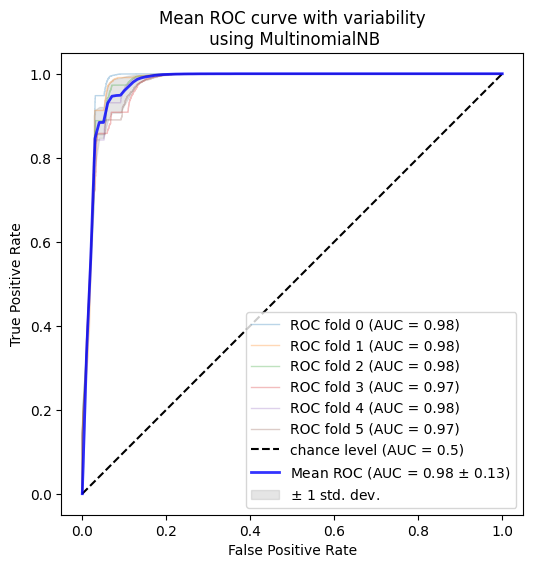

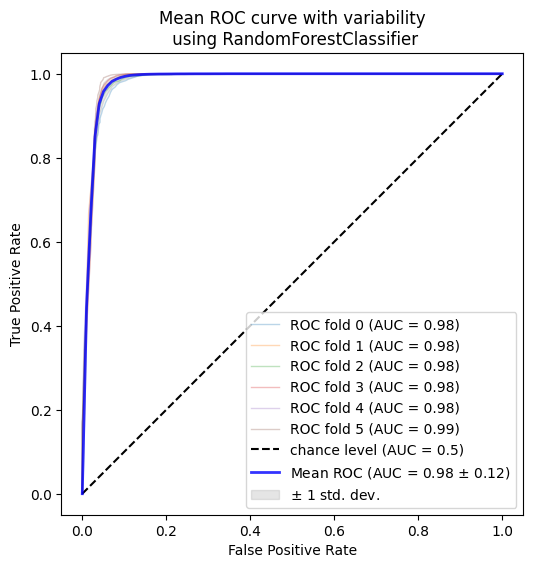

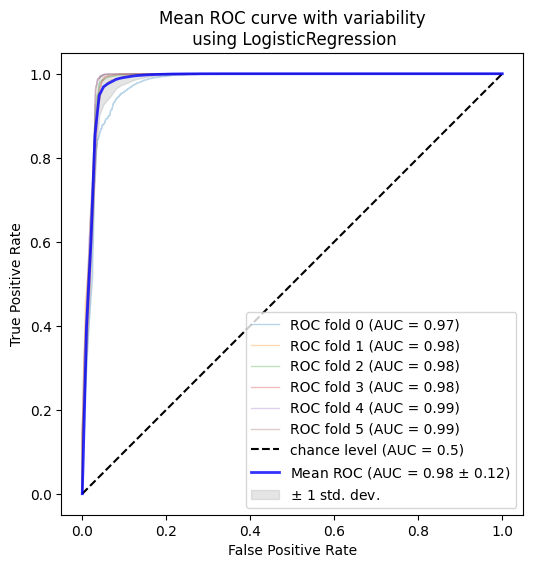

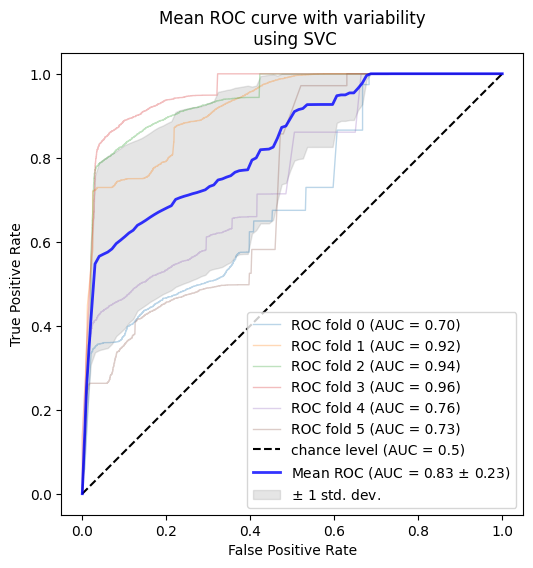

0.9708515283842795


In [ ]:
-from tables.table import Col
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
import time
from sklearn.model_selection  import KFold
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split



def calculate_roc(xts,yts,fold,ax):
  viz = RocCurveDisplay.from_estimator(
    clf,
    xts,
    yts,
    name=f"ROC fold {fold}",
    alpha=0.3,
    lw=1,
    ax=ax,
  )
  interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
  interp_tpr[0] = 0.0
  return interp_tpr, interp_tpr

def set_dictionary(d,params):
  for p,k in zip(params,d.keys()):
    d[k] = p


k = 6
kf = KFold(n_splits=k, shuffle=True, random_state=79)

clf_list = [MultinomialNB,RandomForestClassifier, LogisticRegression ,SVC]
clf_parameter = [
    [(0.1,),(50,"sqrt"),(0.1,) ,(0.1,)],
    [(0.5,),(50,"log2"),(0.5,),(0.5,)],
    [(1.0,),(100,"sqrt"),(1.0,),(1.0,)],
    [(1.5,),(100,"log2"),(2.0,),(1.5,)],
    [(2.0,),(200,"sqrt"),(5.0,),(2.0,)],
    [(2.5,),(200,"log2"),(10.0,),(2.5,)]]

clf_dictionary_par = [
    {"alpha":1.0}, #MNB
    {"n_estimators" : 100 ,  "max_features" : "sqrt"}, #RndF
    {"C" : 1.0 , "solver" : "liblinear"}, #LogR
    {"C" : 1.0,"max_iter" : 500 } #SVC
    ]

#setting the accuracy matrix
accuracy_list =  np.zeros((len(clf_list),k))

#preparing the plot
fig = []
ax = []
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
for i in range(len(clf_list)):
  fig_tmp, ax_tmp = plt.subplots(figsize=(6, 6))
  fig.append(fig_tmp)
  ax.append(ax_tmp)
  tprs.append([])
  aucs.append([])


# Split the data and labels into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data[:,2], data[:, 0], test_size=0.3, random_state=42)


for (i, (train_index, test_index)), parameter_list in zip(enumerate(kf.split(X_train)) , clf_parameter):

  #Separate training and validation fold
  xtr, xts = np.array(X_train)[train_index], np.array(X_train)[test_index]
  ytr, yts = np.array(y_train)[train_index], np.array(y_train)[test_index]

  #tokenize the url using different n_gram of 4 word lenght
  vect = TfidfVectorizer(analyzer = 'char_wb',ngram_range = (4,4))
  feature_tr = vect.fit_transform(xtr)
  feature_ts = vect.transform(xts)

  print(f"[+] Number of features : {len(vect.get_feature_names_out())} \n    Features : {vect.get_feature_names_out()} \n\n" )

  #for each classifier use tune the hyperparameter inside of clf_par list
  for index,(clf,clf_dict,clf_par) in enumerate(zip(clf_list,clf_dictionary_par,parameter_list)):

    #setting different hyperparameter for tuning it with the classifiers
    set_dictionary(clf_dict,clf_par)

    #calucate the metrics, based on the hyperparameter
    start  = time.time()
    clf = clf(**clf_dict)
    clf.fit(feature_tr, ytr)
    ypred = clf.predict(feature_ts)
    accuracy_list[index][i] = accuracy_score(yts, ypred)
    print(f"[{i+1}] Classifier : {clf.__class__.__name__} \n    With the following Hyper parameters {clf_dict} \n    Accuracy : {accuracy_list[index][i]} in {round(time.time()-start,2)} sec \n\n")

    #retriving the values for the ROC curve
    interp_tpr ,roc_auc =  calculate_roc(feature_ts,yts,i,ax[index])
    tprs[index].append(interp_tpr)
    aucs[index].append(roc_auc)

#for each classifier return the best hyperpameter, based on the accuracy
for col,(clf , row) in enumerate(zip(clf_list , np.argmax(accuracy_list, axis=1))):
  print(f"[+] Classifier : {clf().__class__.__name__} best Hyper parameter are : {tuple(zip(clf_dictionary_par[col].keys(),clf_parameter[row][col]))} ")

#this part of the code is dedicated to plot the ROC curve
for i in range(len(clf_list)):
  ax[i].plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")

  mean_tpr = np.mean(tprs[i], axis=0)
  mean_tpr[-1] = 1.0
  mean_auc = auc(mean_fpr, mean_tpr)
  std_auc = np.std(aucs[i])
  ax[i].plot(
      mean_fpr,
      mean_tpr,
      color="b",
      label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
      lw=2,
      alpha=0.8,
  )

  std_tpr = np.std(tprs[i], axis=0)
  tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
  tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
  ax[i].fill_between(
      mean_fpr,
      tprs_lower,
      tprs_upper,
      color="grey",
      alpha=0.2,
      label=r"$\pm$ 1 std. dev.",
  )

  ax[i].set(
      xlim=[-0.05, 1.05],
      ylim=[-0.05, 1.05],
      xlabel="False Positive Rate",
      ylabel="True Positive Rate",
      title=f"Mean ROC curve with variability\n using {clf_list[i]().__class__.__name__}",
  )
  ax[i].axis("square")
  ax[i].legend(loc="lower right")

plt.show()

#test the best classifier
clf = RandomForestClassifier(n_estimators = 200 ,  max_features = "log2")

vect = TfidfVectorizer(analyzer = 'char_wb',ngram_range = (4,4))
feature_tr = vect.fit_transform(X_train)
feature_ts = vect.transform(X_test)
clf.fit(feature_tr,y_train)
ypred = clf.predict(feature_ts)
acc = accuracy_score(y_test, ypred)



